# Applying Winsorization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer

In [2]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [3]:
# lower limits

q05 = X_train.quantile(0.05).to_dict()

In [4]:
# upper limits

q95 = X_train.quantile(0.95).to_dict()

In [5]:
train_t = X_train.clip(lower=q05, upper=q95)
test_t = X_test.clip(lower=q05, upper=q95)

In [6]:
var = 'worst smoothness'

X_train[var].agg(["min", "max", "mean"])

min     0.071170
max     0.222600
mean    0.132529
Name: worst smoothness, dtype: float64

In [7]:
train_t[var].agg(["min", "max", "mean"])

min     0.096053
max     0.173215
mean    0.132063
Name: worst smoothness, dtype: float64

In [8]:
def plot_boxplot_and_hist(data, variable):
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)
    plt.show()

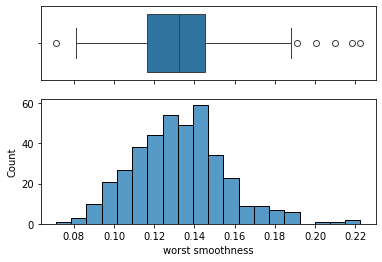

In [9]:
plot_boxplot_and_hist(X_train, var)

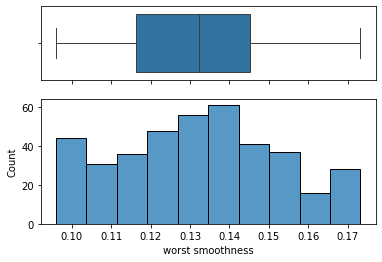

In [10]:
plot_boxplot_and_hist(train_t, var)

## Feature-engine

In [11]:
capper = Winsorizer(
    variables=["worst smoothness", "worst texture"],
    capping_method="quantiles",
    tail="both",
    fold=0.05,
)

capper.fit(X_train)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['worst smoothness', 'worst texture'])

In [12]:
capper.left_tail_caps_

{'worst smoothness': 0.0960535, 'worst texture': 16.7975}

In [13]:
capper.right_tail_caps_

{'worst smoothness': 0.17321499999999998, 'worst texture': 36.2775}

In [14]:
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

X_train[capper.variables_].min(), train_t[capper.variables_].max()

(worst smoothness     0.07117
 worst texture       12.02000
 dtype: float64,
 worst smoothness     0.173215
 worst texture       36.277500
 dtype: float64)